# Clustering de Datos
**Actividad 7**

Alicia Christyna Martínez Parra

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from utils import path_loader as p

In [84]:
# Load csv file
try:
    df = pd.read_csv(p.generate_file_path(
        file_name='avocado_prices_processed', file_extension='csv', directory='output'))

    n_row, n_col = df.shape
    print(f'CSV File loaded succesfully!\nThere are {n_row} rows and {n_col} columns')
except Exception as e:
    print(f'Something wrong happended!: {e}')

CSV File loaded succesfully!
There are 18249 rows and 13 columns


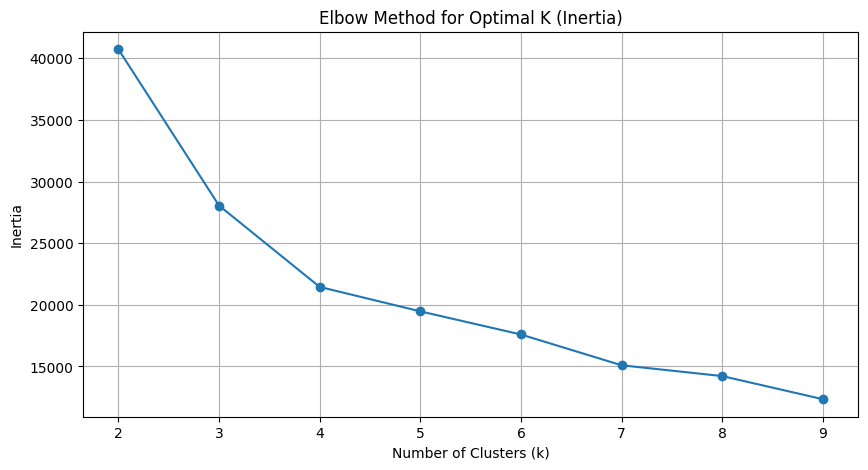

In [85]:
# Selecting features for clustering
X_clustering = df[['total_volume', '4046', '4225', '4770', 'total_bags', 'small_bags', 'large_bags', 'x_large_bags']]

# Standardizing the data for clustering
scaler = StandardScaler()
X_scaled_clustering = scaler.fit_transform(X_clustering)

# Using the elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_clustering)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled_clustering, kmeans.labels_))

# Plotting the elbow method (inertia)
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

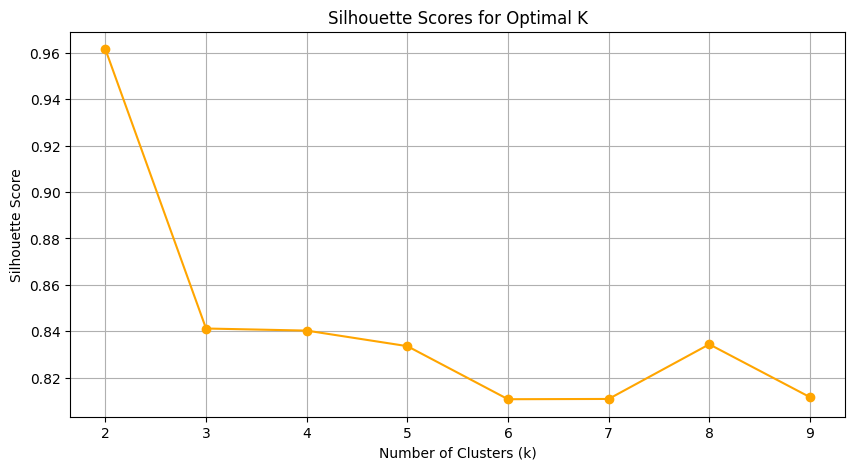

In [86]:
# Plotting silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [89]:
# Using the KneeLocator to determine the optimal number of clusters (k)
knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

# Performing K-Means clustering with the selected k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_scaled_clustering)

# Adding the cluster labels to the original DataFrame
df['Cluster'] = kmeans_final.labels_

# Displaying the cluster centers
cluster_centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X_clustering.columns)

# Displaying the first few rows with cluster assignments
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,x_large_bags,type,year,region,Cluster
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,1
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1


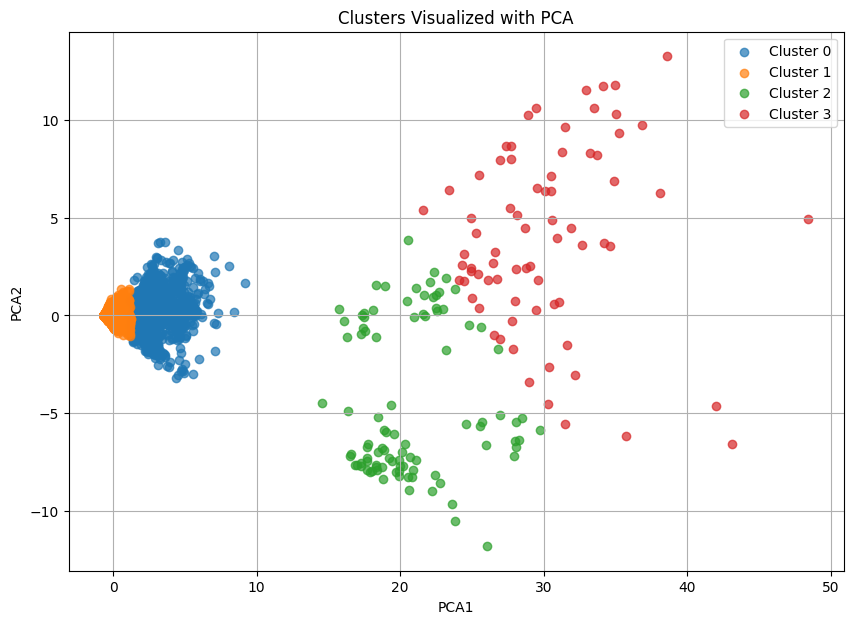

In [88]:
# Step 1: Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_clustering)

# Step 2: Add PCA components and cluster labels to a new DataFrame
visualization_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
visualization_df['Cluster'] = df['Cluster']

# Step 3: Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_data = visualization_df[visualization_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title("Clusters Visualized with PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid(True)
plt.show()